# Pre processing of Inventory Dataset

## 1.Importing packages

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Load the dataset

In [201]:
s=pd.read_csv(r'C:\Users\CVR\Downloads\inventory_data_noisy.csv')

In [202]:
s

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


## 3.Preprocessing

In [203]:
s.columns

Index(['Dealer_ID', 'Product_ID', 'Date', 'Quantity', 'Consumption',
       'Location'],
      dtype='object')

In [204]:
s.head(10)

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
5,D000,P000,2022-01-06,29.0,12.0,Los Angeles
6,D000,P000,2022-01-07,21.0,14.0,New York
7,D000,P000,2022-01-08,54.0,15.0,New York
8,D000,P000,2022-01-09,48.0,10.0,New York
9,D000,P000,2022-01-10,33.0,19.0,New York


In [205]:
s.shape

(18360, 6)

In [206]:
s.tail()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York
18359,D005,P003,2022-03-01,33.0,7.0,Chicago


In [207]:
s.info

<bound method DataFrame.info of       Dealer_ID Product_ID        Date  Quantity  Consumption     Location
0          D000       P000  2022-01-01      62.0          8.0      Chicago
1          D000       P000  2022-01-02      70.0          9.0      Chicago
2          D000       P000  2022-01-03      12.0         17.0  Los Angeles
3          D000       P000  2022-01-04      74.0         13.0  Los Angeles
4          D000       P000  2022-01-05      57.0         10.0  Los Angeles
...         ...        ...         ...       ...          ...          ...
18355      D001       P012  2022-02-19      71.0         15.0  Los Angeles
18356      D003       P014  2022-01-26      47.0         12.0  Los Angeles
18357      D001       P013  2022-02-14      89.0          8.0      Chicago
18358      D004       P017  2022-03-24      29.0          6.0     New York
18359      D005       P003  2022-03-01      33.0          7.0      Chicago

[18360 rows x 6 columns]>

In [208]:
s.describe()

,Quantity,Consumption
count,18268.000000,18268.000000
mean,59.105704,12.938526
std,71.085667,13.313527
min,10.000000,5.000000
25%,32.000000,8.000000
50%,54.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


In [209]:
s.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

## 4. Handling duplicate values

In [210]:

s.duplicated().sum()

349

In [211]:
s.drop_duplicates(inplace=True)

In [212]:
s.duplicated().sum()

0

## 5.Handling Missing values

In [213]:
s.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [214]:
s

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,NaN,NaN,NaN
18264,D001,P010,2022-01-27,26.0,18.0,Chicago
18328,D001,P014,2022-01-14,30.0,5.0,Chicago
18337,D001,P013,2022-01-26,48.0,15.0,Chicago


In [215]:
s['Quantity'].mean()

59.232379039008876

In [216]:
s['Quantity'].median()

54.0

In [217]:
s['Quantity'].mode()

0    18.0
Name: Quantity, dtype: float64

In [218]:
s['Quantity'].fillna(18.0,inplace=True)

In [219]:
s.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption     92
Location       184
dtype: int64

In [220]:
s['Consumption'].mode()

0    19.0
Name: Consumption, dtype: float64

In [221]:
s['Consumption'].mean()

12.95250851051956

In [222]:
s['Consumption'].median()

12.0

In [223]:
s['Consumption'].fillna(19.0,inplace=True)

In [224]:
s['Consumption'].mode()

0    19.0
Name: Consumption, dtype: float64

In [225]:
s['Consumption'].mean()

12.983399033923714

In [226]:
s['Consumption'].median()

12.0

In [227]:
s.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

In [228]:
s['Location'].mode()

0    New York
Name: Location, dtype: object

In [229]:
s['Location'].fillna("New York",inplace=True)

In [230]:
s.isnull().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [231]:
s

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,18.0,19.0,New York
18264,D001,P010,2022-01-27,26.0,18.0,Chicago
18328,D001,P014,2022-01-14,30.0,5.0,Chicago
18337,D001,P013,2022-01-26,48.0,15.0,Chicago


In [232]:
s.info

<bound method DataFrame.info of       Dealer_ID Product_ID        Date  Quantity  Consumption     Location
0          D000       P000  2022-01-01      62.0          8.0      Chicago
1          D000       P000  2022-01-02      70.0          9.0      Chicago
2          D000       P000  2022-01-03      12.0         17.0  Los Angeles
3          D000       P000  2022-01-04      74.0         13.0  Los Angeles
4          D000       P000  2022-01-05      57.0         10.0  Los Angeles
...         ...        ...         ...       ...          ...          ...
18253      D008       P013  2022-02-29      18.0         19.0     New York
18264      D001       P010  2022-01-27      26.0         18.0      Chicago
18328      D001       P014  2022-01-14      30.0          5.0      Chicago
18337      D001       P013  2022-01-26      48.0         15.0      Chicago
18343      D000       P002  2022-03-12      42.0          6.0      Chicago

[18011 rows x 6 columns]>

In [233]:
s.describe

<bound method NDFrame.describe of       Dealer_ID Product_ID        Date  Quantity  Consumption     Location
0          D000       P000  2022-01-01      62.0          8.0      Chicago
1          D000       P000  2022-01-02      70.0          9.0      Chicago
2          D000       P000  2022-01-03      12.0         17.0  Los Angeles
3          D000       P000  2022-01-04      74.0         13.0  Los Angeles
4          D000       P000  2022-01-05      57.0         10.0  Los Angeles
...         ...        ...         ...       ...          ...          ...
18253      D008       P013  2022-02-29      18.0         19.0     New York
18264      D001       P010  2022-01-27      26.0         18.0      Chicago
18328      D001       P014  2022-01-14      30.0          5.0      Chicago
18337      D001       P013  2022-01-26      48.0         15.0      Chicago
18343      D000       P002  2022-03-12      42.0          6.0      Chicago

[18011 rows x 6 columns]>

## 6.Convert the datatypes of Consumption and Qunatity columns to int from float

In [234]:
s['Consumption']=s['Consumption'].astype(int)

In [235]:
s['Quantity']=s['Quantity'].astype(int)

In [236]:
s.dtypes

Dealer_ID      object
Product_ID     object
Date           object
Quantity        int32
Consumption     int32
Location       object
dtype: object

## 7. Cheking Unique values of all the columns

In [237]:
s.nunique()


Dealer_ID      10
Product_ID     20
Date           90
Quantity       91
Consumption    16
Location        3
dtype: int64

## Summary statistics

In [238]:
s.describe()

,Quantity,Consumption
count,18011.000000,18011.000000
mean,59.021764,12.983399
std,71.550452,13.401294
min,10.000000,5.000000
25%,32.000000,8.000000
50%,54.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


# Data Visualization

## 1. Checking for Outliers

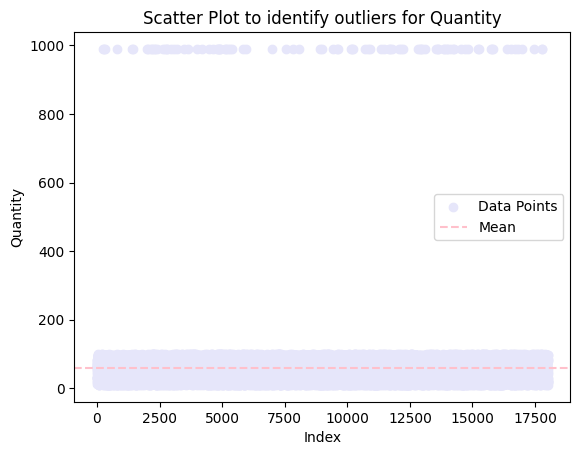

In [239]:
plt.scatter(range(len(s)),s['Quantity'],color='lavender',label='Data Points')
plt.axhline(y=s['Quantity'].mean(),color='pink',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Scatter Plot to identify outliers for Quantity")
plt.legend()
plt.show()

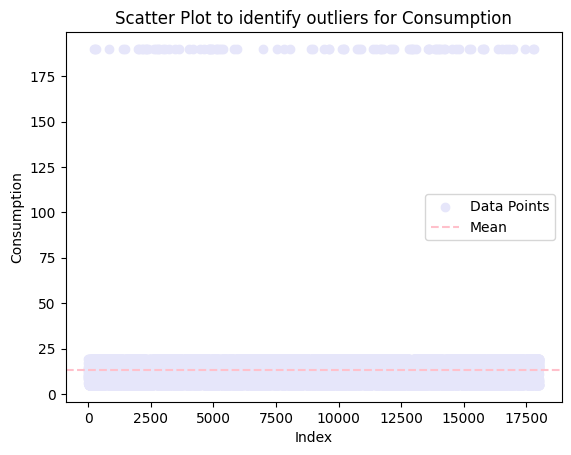

In [240]:
plt.scatter(range(len(s)),s['Consumption'],color='lavender',label='Data Points')
plt.axhline(y=s['Consumption'].mean(),color='pink',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Consumption")
plt.title("Scatter Plot to identify outliers for Consumption")
plt.legend()
plt.show()

In [241]:
Q1 = s['Quantity'].quantile(0.25)
Q3 = s['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

s['Outlier_IQR'] = s['Quantity'].apply(lambda x: 'Outlier' if ( x< lower_bound or x > upper_bound) else 'Normal')
print(s[s['Outlier_IQR']=='Outlier'])

      Dealer_ID Product_ID        Date  Quantity  Consumption  Location  \
247        D000       P002  2022-03-08       990          190  New York   
273        D000       P003  2022-01-04       990          190  New York   
326        D000       P003  2022-02-27       990          190  New York   
820        D000       P009  2022-01-11       990          190  New York   
1397       D000       P015  2022-02-18       990          190  New York   
...         ...        ...         ...       ...          ...       ...   
16803      D009       P006  2022-03-04       990          190  New York   
16973      D009       P008  2022-02-24       990          190  New York   
17437      D009       P013  2022-03-08       990          190  New York   
17777      D009       P017  2022-02-18       990          190  New York   
17788      D009       P017  2022-02-29       990          190  New York   

      Outlier_IQR  
247       Outlier  
273       Outlier  
326       Outlier  
820       Outlier  

In [242]:
Q1 = s['Consumption'].quantile(0.25)
Q3 = s['Consumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

s['Outlier_IQR'] = s['Consumption'].apply(lambda x: 'Outlier' if ( x< lower_bound or x > upper_bound) else 'Normal')
print(s[s['Outlier_IQR']=='Outlier'])

      Dealer_ID Product_ID        Date  Quantity  Consumption  Location  \
247        D000       P002  2022-03-08       990          190  New York   
273        D000       P003  2022-01-04       990          190  New York   
326        D000       P003  2022-02-27       990          190  New York   
820        D000       P009  2022-01-11       990          190  New York   
1397       D000       P015  2022-02-18       990          190  New York   
...         ...        ...         ...       ...          ...       ...   
16803      D009       P006  2022-03-04       990          190  New York   
16973      D009       P008  2022-02-24       990          190  New York   
17437      D009       P013  2022-03-08       990          190  New York   
17777      D009       P017  2022-02-18       990          190  New York   
17788      D009       P017  2022-02-29       990          190  New York   

      Outlier_IQR  
247       Outlier  
273       Outlier  
326       Outlier  
820       Outlier  

In [243]:
# Function to remove outliers using IQR

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Quantity", "Consumption"]  
s= remove_outliers_iqr(s, columns_to_filter)


## 2.After removing outliers

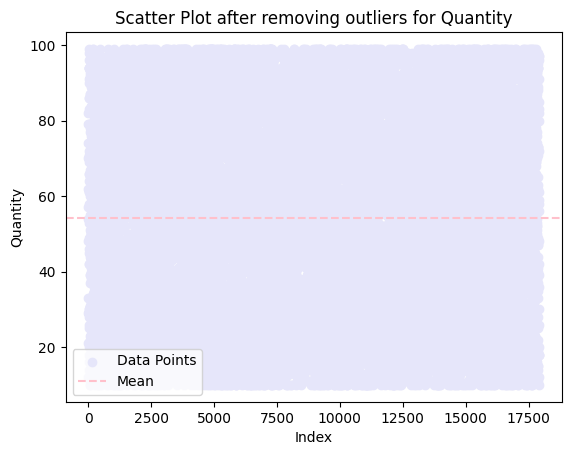

In [244]:
plt.scatter(range(len(s)),s['Quantity'],color='lavender',label='Data Points')
plt.axhline(y=s['Quantity'].mean(),color='pink',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Scatter Plot after removing outliers for Quantity")
plt.legend()
plt.show()

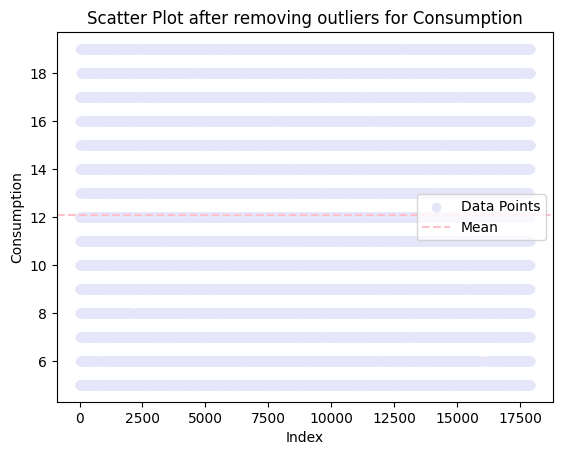

In [245]:
plt.scatter(range(len(s)),s['Consumption'],color='lavender',label='Data Points')
plt.axhline(y=s['Consumption'].mean(),color='pink',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Consumption")
plt.title("Scatter Plot after removing outliers for Consumption")
plt.legend()
plt.show()

## 3.Categorical values present in the dataset

In [246]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(s['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(s['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(s['Location'].unique())

Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


## 4.Defining Numerical and categorical values

In [247]:
# define numerical & categorical columns
numeric_features = [feature for feature in s.columns if s[feature].dtype != 'O']
categorical_features = [feature for feature in s.columns if s[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Quantity', 'Consumption']

We have 5 categorical features : ['Dealer_ID', 'Product_ID', 'Date', 'Location', 'Outlier_IQR']


## 5.Adding Consumption level column and Quantity consumption ratios

In [248]:
## Adding column requirement based on Quantity and Consumption
low_threshold = s["Consumption"].quantile(0.33)
high_threshold = s["Consumption"].quantile(0.66)

In [249]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

s["Consumption_Level"] = s["Consumption"].apply(categorize_consumption)

s['Quantity_consumption_ratios'] = s['Quantity']/s['Consumption']

We've added two columns to your dataset to aid in classification:
Consumption_Level: A categorical column that classifies Consumption into three levels: "Low", "Medium", and "High", based on quantiles.

**This classification splits the Consumption values into three groups:**

Low: The bottom 33% of consumption values.

Medium: The middle 33% of consumption values.

High: The top 33% of consumption values.

--> This is useful for classification tasks that focus on predicting consumption levels as discrete categories.

Quantity_consumption_ratios: A ratio column representing the relationship between Quantity and Consumption.
This column provides insight into how much product is being consumed relative to the quantity ordered.

High ratios might indicate high efficiency (high consumption relative to order size), while low ratios may indicate excess quantities being ordered or under-utilization.

***Insights on the Classification Columns:***

**Consumption_Level:**

-> Balanced Distribution: Since you used quantiles to split the data, each category ("Low", "Medium", and "High") will approximately contain an equal number of records (around one-third of the total data).

-> Use Case: This column is valuable for multiclass classification tasks, where you can train a model to predict whether consumption will fall into the "Low", "Medium", or "High" category based on other features like Dealer_ID, Product_ID, Location, and Quantity.

->Potential Analysis: You could explore which factors contribute most to different consumption levels.

-> Visualizing the distribution of other features (like Quantity) within each consumption level could uncover patterns or insights.

**Quantity_consumption_ratios:**


-> Range of Values: This ratio will vary depending on the relative values of Quantity and Consumption.

Ratios > 1 indicate that more quantity was ordered than consumed.

Ratios < 1 indicate that more consumption occurred relative to the quantity ordered, which may imply a shortage or high demand.

-> Use Case: This column can be used as a feature in regression or classification tasks to understand the relationship between how much is ordered versus how much is used.

-> It can also serve as an indicator of efficiency, helping to identify cases where consumption is much lower than the quantity ordered (waste) or much higher (demand).

In [250]:
s

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Outlier_IQR,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62,8,Chicago,Normal,Low,7.750000
1,D000,P000,2022-01-02,70,9,Chicago,Normal,Low,7.777778
2,D000,P000,2022-01-03,12,17,Los Angeles,Normal,High,0.705882
3,D000,P000,2022-01-04,74,13,Los Angeles,Normal,Medium,5.692308
4,D000,P000,2022-01-05,57,10,Los Angeles,Normal,Low,5.700000
...,...,...,...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,18,19,New York,Normal,High,0.947368
18264,D001,P010,2022-01-27,26,18,Chicago,Normal,High,1.444444
18328,D001,P014,2022-01-14,30,5,Chicago,Normal,Low,6.000000
18337,D001,P013,2022-01-26,48,15,Chicago,Normal,Medium,3.200000


## 6.Visualize Quantity and consumption distribution to make some conclusion.

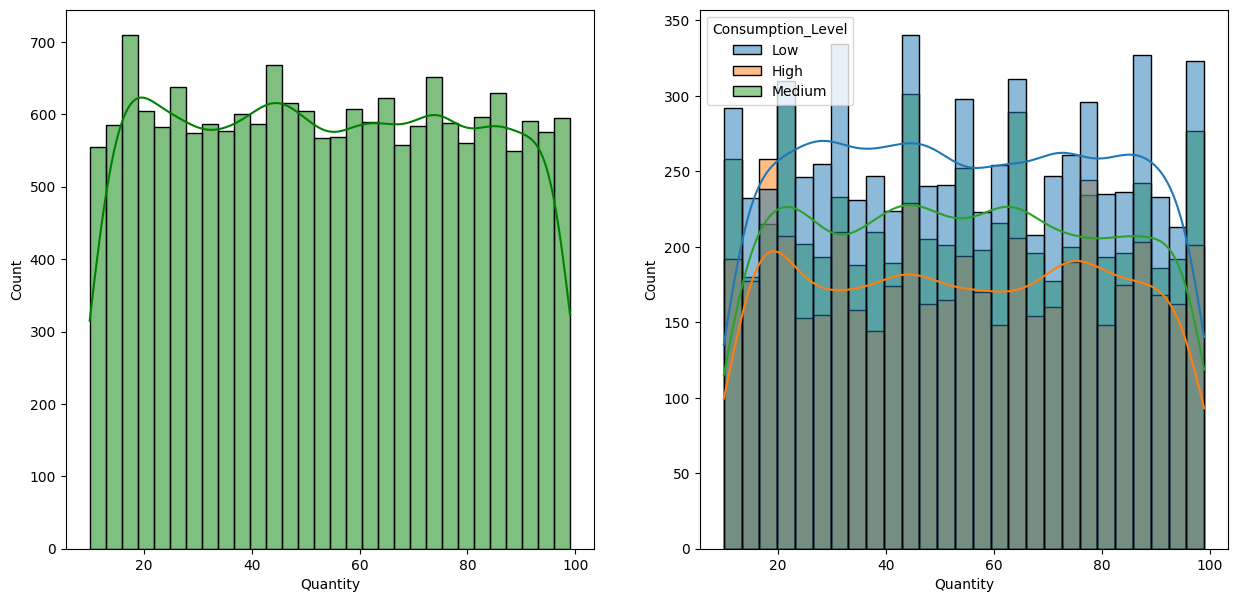

In [251]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=s,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=s,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()


## Left Plot (Overall Quantity Distribution)
1. The Quantity values are evenly distributed across the entire range (from ~0 to 100).
2. The frequency of occurrences is relatively uniform, indicating that quantity values are not skewed toward any particular range.
3. The KDE curve is mostly flat, with minor fluctuations, reinforcing the idea of a near-uniform distribution.
4. There are no extreme peaks or dips, meaning no particular quantity range is overly dominant.

## Right Plot (Quantity Distribution by Consumption Level)
1. The Low Consumption Level (blue) has the highest frequency across most bins.
2. Medium Consumption (green) and High Consumption (orange) are distributed fairly evenly, but Medium Consumption is the least frequent.
3. The KDE curves suggest:
     1. Low Consumption is the most common category throughout.
     2. High Consumption is more concentrated in specific ranges.
     3. Medium Consumption is relatively stable but lower in frequency.
4. This indicates that most products or customers fall into the Low Consumption category, while High Consumption is less frequent.
## Key Takeaways
1. The overall distribution suggests a diverse range of quantities with no extreme bias.
2. Low Consumption dominates the dataset, meaning the model may predict this class more often.

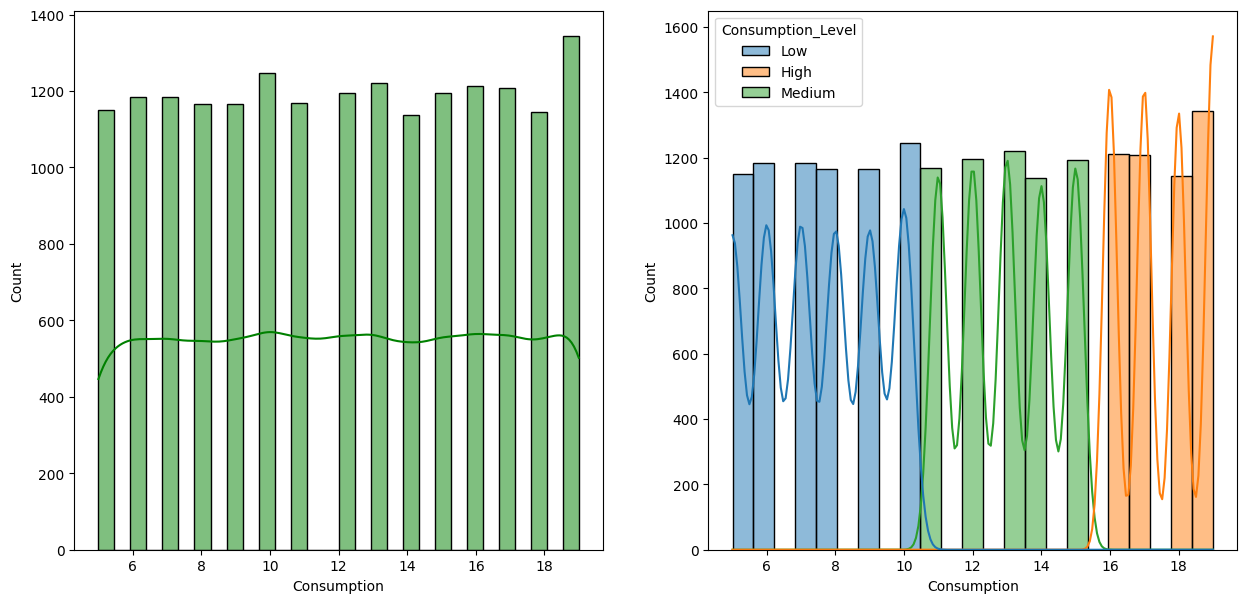

In [252]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=s,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=s,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()



## Left Plot (Overall Consumption Distribution)
1. The consumption values are spread out between 5 and 19.
2. The distribution is fairly uniform, with no significant peaks or dips.
3. The KDE curve is relatively stable, indicating that consumption values occur at almost equal frequencies.
4. There is no clear skew, meaning that all consumption levels appear to be relatively balanced.

## Right Plot (Consumption Distribution by Consumption Level)
1. The data is segmented into three categories: Low, Medium, and High Consumption Levels.
2. Low Consumption (blue) is dominant in the 5 to 10 range.
3. Medium Consumption (green) is concentrated between 11 and 14.
4. High Consumption (orange) starts around 15 and goes up to 19.
5. Each consumption level has a well-defined range with minimal overlap, meaning the categories are distinct.
6. The KDE curves indicate some oscillations in frequency, especially for Low and High consumption levels.

## Key Takeaways
1. The dataset has clear separation between Low, Medium, and High consumption levels.
2. Most data points in the Low category are clustered around 5-10, while High consumption is concentrated in the upper range (15-19).
3. There might be a potential threshold effect, where consumption values naturally fall into these three groups.

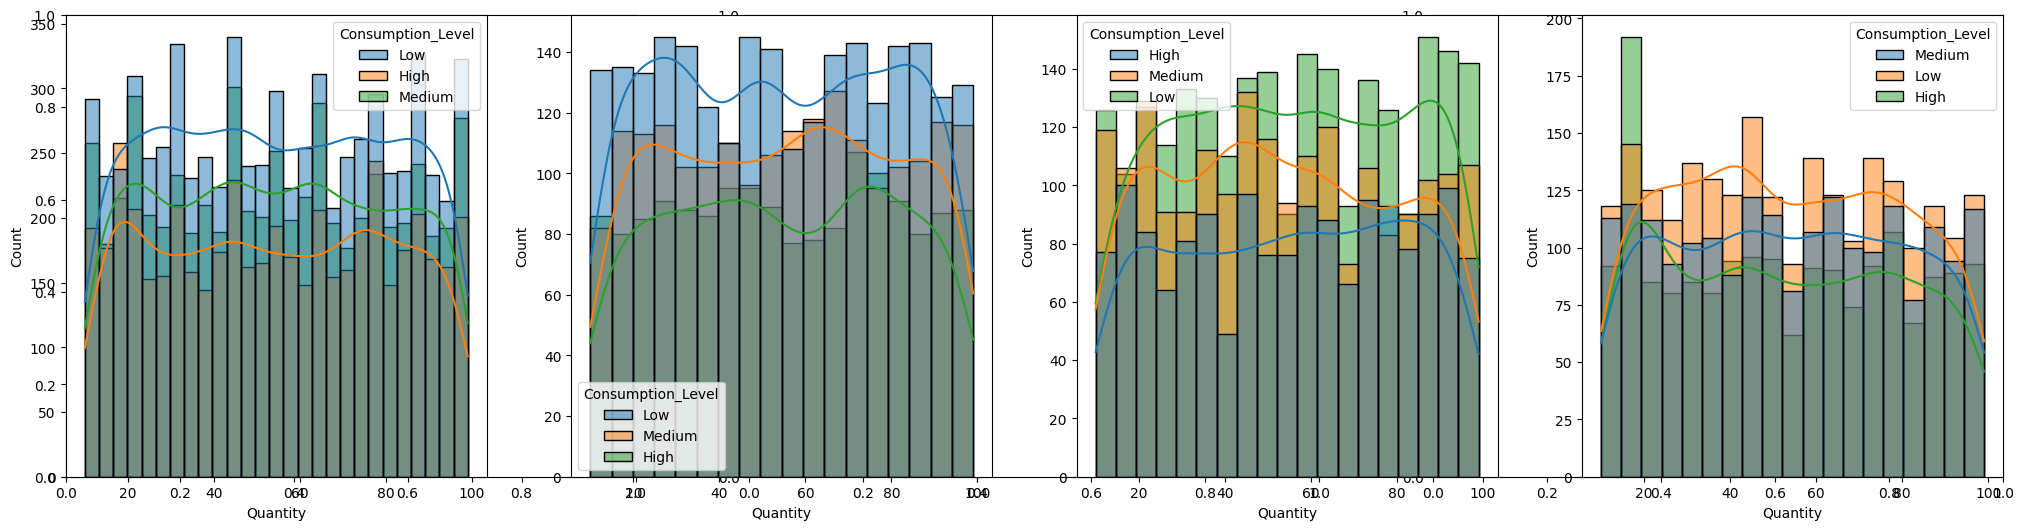

In [253]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=s,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=s[s.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=s[s.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=s[s.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

## Insights on above plots

### Balanced Distribution Across Quantity:

1. The Quantity values seem to be fairly evenly distributed across the three consumption levels.
2. There are no extreme skews or clear separations among the classes.

### Consumption Levels Overlap:

1. The three consumption categories (Low, Medium, High) show overlapping density curves.
2. This suggests that Quantity alone might not be a strong differentiator for Consumption_Level.

### Possible Trends in KDE Curves:

1. The Low Consumption (blue line) appears more frequent at lower quantity values.
2. The Medium Consumption (orange line) is spread across the middle.
3. The High Consumption (green line) has peaks toward the higher quantity values.

In [254]:
s.dtypes

Dealer_ID                       object
Product_ID                      object
Date                            object
Quantity                         int32
Consumption                      int32
Location                        object
Outlier_IQR                     object
Consumption_Level               object
Quantity_consumption_ratios    float64
dtype: object

In [255]:
s.shape

(17919, 9)

## 7.Multivariate analysis using pieplot

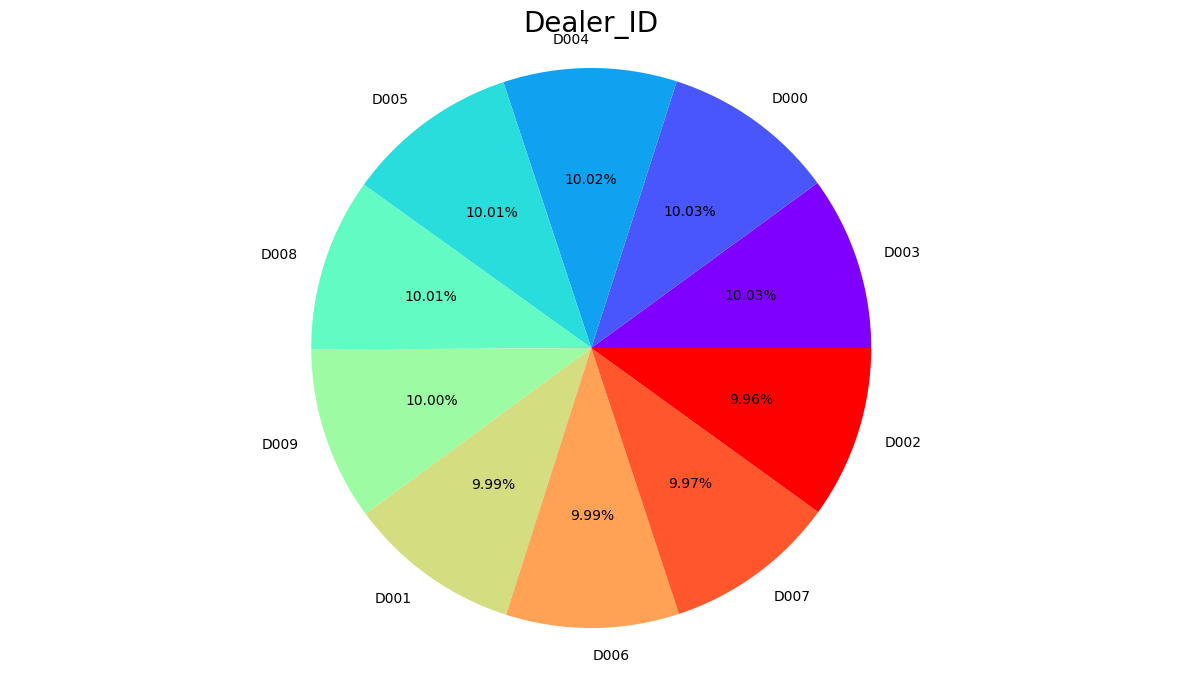

In [256]:
#for Dealer_ID - pie chart
plt.figure(figsize=(15, 8))

size = s['Dealer_ID'].value_counts()
labels = size.index
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.title('Dealer_ID', fontsize=20)

plt.axis('equal')
plt.show()

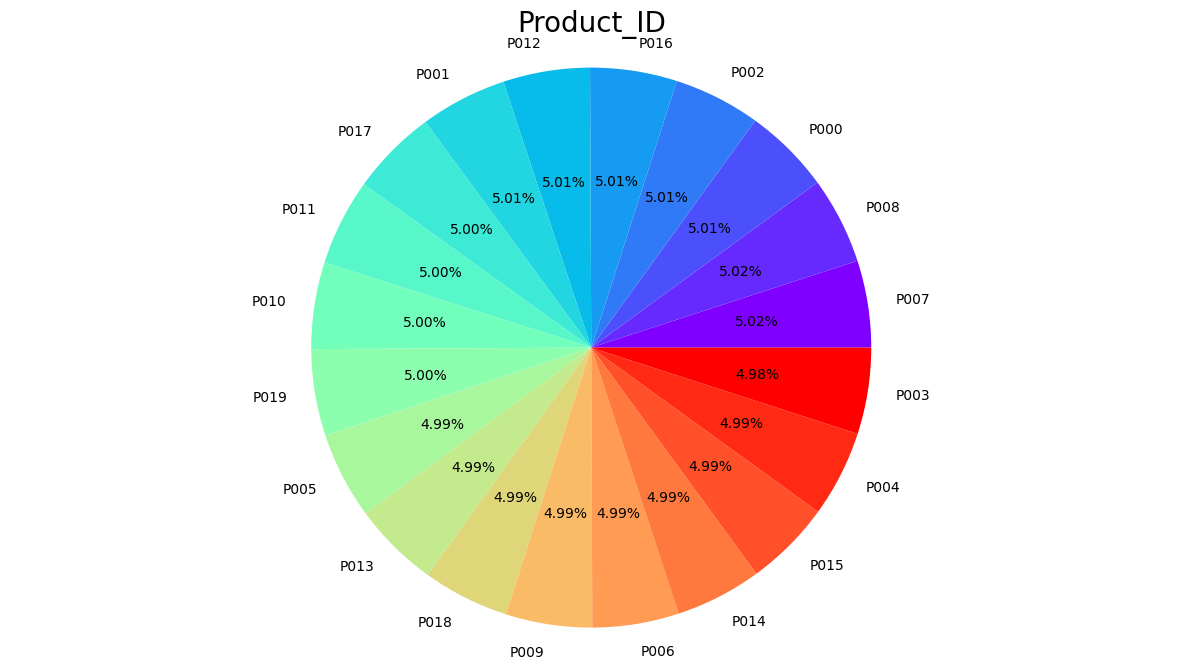

In [257]:
#for Product_ID - pie chart
plt.figure(figsize=(15, 8))

size = s['Product_ID'].value_counts()
labels = size.index
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.title('Product_ID', fontsize=20)

plt.axis('equal')
plt.show()

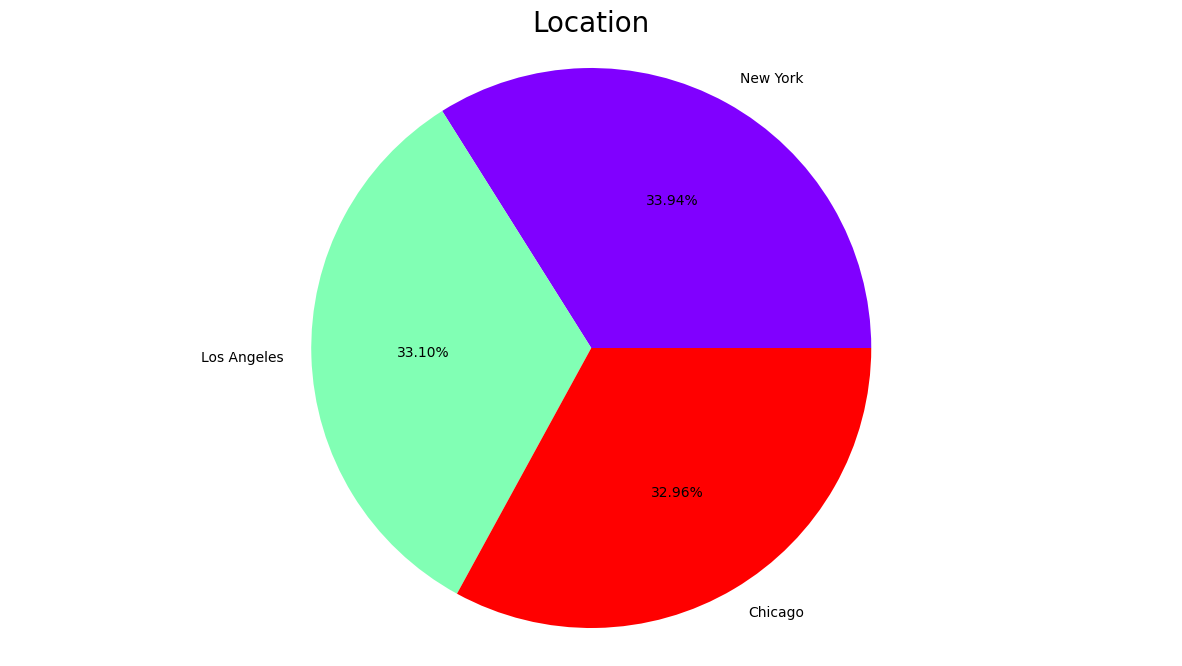

In [258]:
#for Product_ID - pie chart
plt.figure(figsize=(15, 8))

size = s['Location'].value_counts()
labels = size.index
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.title('Location', fontsize=20)

plt.axis('equal')
plt.show()

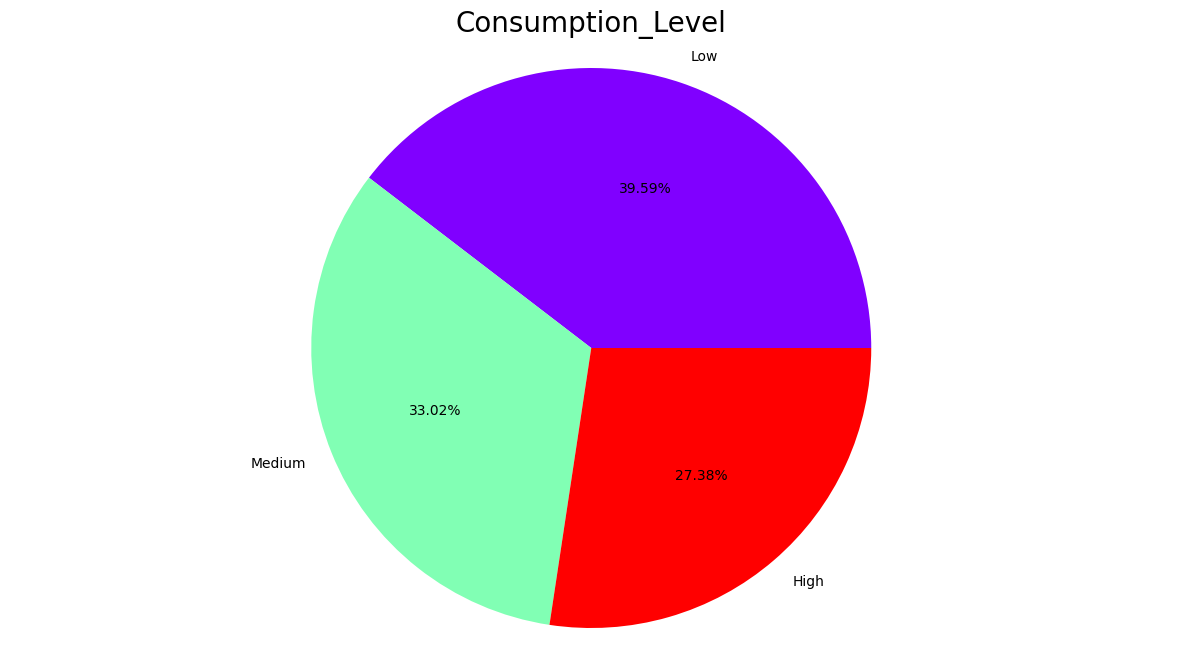

In [259]:
#for Product_ID - pie chart
plt.figure(figsize=(15, 8))

size = s['Consumption_Level'].value_counts()
labels = size.index
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.title('Consumption_Level', fontsize=20)

plt.axis('equal')
plt.show()

### Location Distribution:
    The data is almost evenly split among the three cities:
    1. Chicago (~33.6%)
    2. Los Angeles (~33.3%)
    3. New York (~33.1%)
    4. This suggests that sales or consumption data is well-balanced across locations, meaning location alone may not be a strong predictor of consumption behavior.
### Dealer_ID Distribution:
    1. All 10 dealers have nearly equal representation (~10%) in the dataset.
    2. This indicates that no single dealer dominates the sales, making the dataset more diverse and preventing dealer bias.
###  Product_ID Distribution:
    1. The distribution of products is almost uniform, with each product making up about 5% of the dataset.
    2. There is no extreme dominance of a single product, which suggests that different products contribute evenly to sales/consumption.
### Consumption Level Distribution:
    1. Low Consumption is the largest category (~39.8%).
    2. Medium Consumption makes up about 33.7%.
    3. High Consumption is the smallest group at 26.5%.
    The imbalance in consumption levels suggests that most products or locations tend to fall into the low-to-medium consumption range, while high consumption is less common

## 8.Feature Wise Visualization

### 8.1) UNIVARIATE ANALYSIS ON LOCATION COLUMN¶

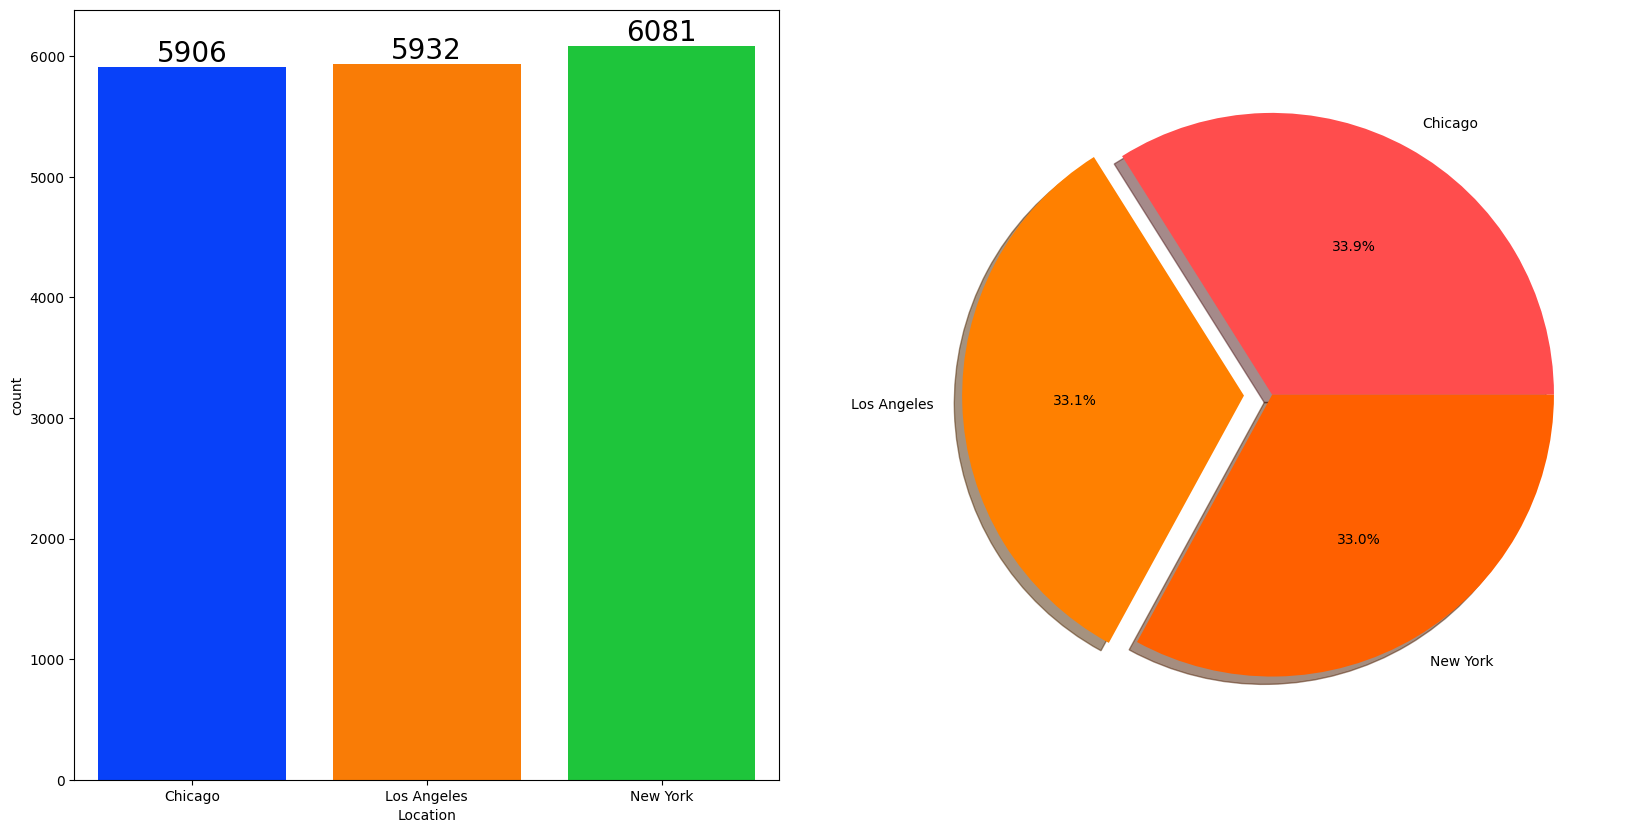

In [260]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=s['Location'],data=s,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=s['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

## Insights from the Above Plot:
#### Bar Chart (Left Plot):

1. This represents the count of some category (possibly transactions, sales, or inventory) across three locations: Chicago, Los Angeles, and New York.

2. New York has the highest count (6081), followed by Los Angeles (5932), and Chicago (5906).

3. The differences among the locations are small, indicating a fairly even distribution.

#### Pie Chart (Right Plot):

1. This shows the percentage contribution of each location to the total count.

2. Chicago (33.9%) has the highest share, while Los Angeles (33.1%) and New York (33.0%) are nearly equal.

3. The Los Angeles slice is slightly exploded, possibly to highlight its contribution.

#### Key Takeaways:

1. The distribution of counts across the three locations is almost equal, with no significant outliers.

2. This indicates a balanced distribution of resources/sales/inventory across the locations.

3. If this represents sales data, it suggests all three cities contribute nearly equally to overall performance.

### 8.2)BIVARIATE ANALYSIS ( Is Location has any impact on Consumption ? )









In [261]:
location_group = s.groupby('Location')
location_group

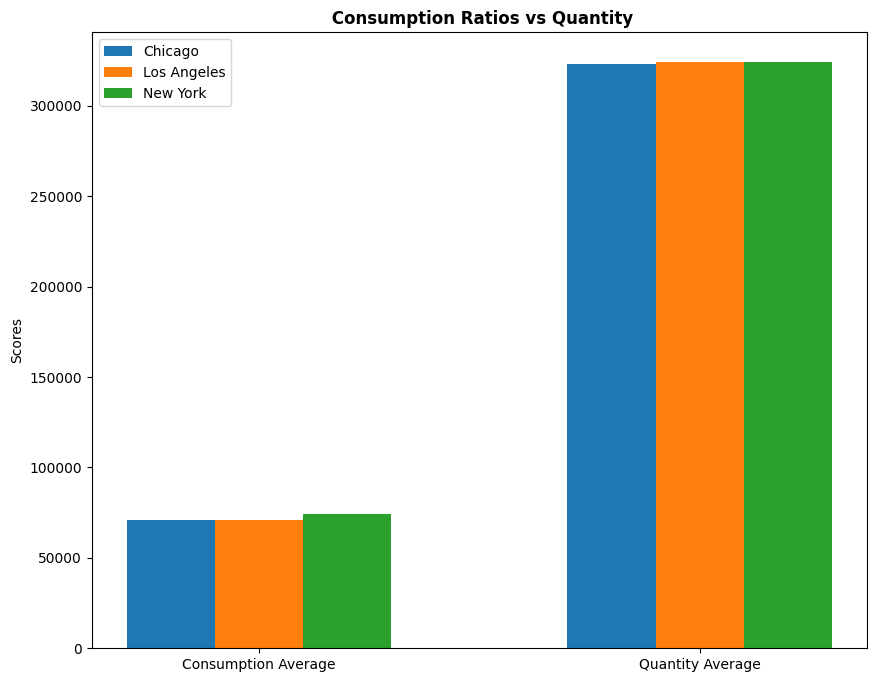

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by 'Location' and aggregating using the sum of the relevant columns
location_group = s.groupby('Location').sum()
# Extracting the required data from the aggregated DataFrame
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]

# Plot
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

# Plot the bars with proper offsets for each city
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York')

# Set the x-axis labels and the chart's title
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')

# Show legend and plot
plt.legend()
plt.show()

### 8.3)Univariate analysis for dealers

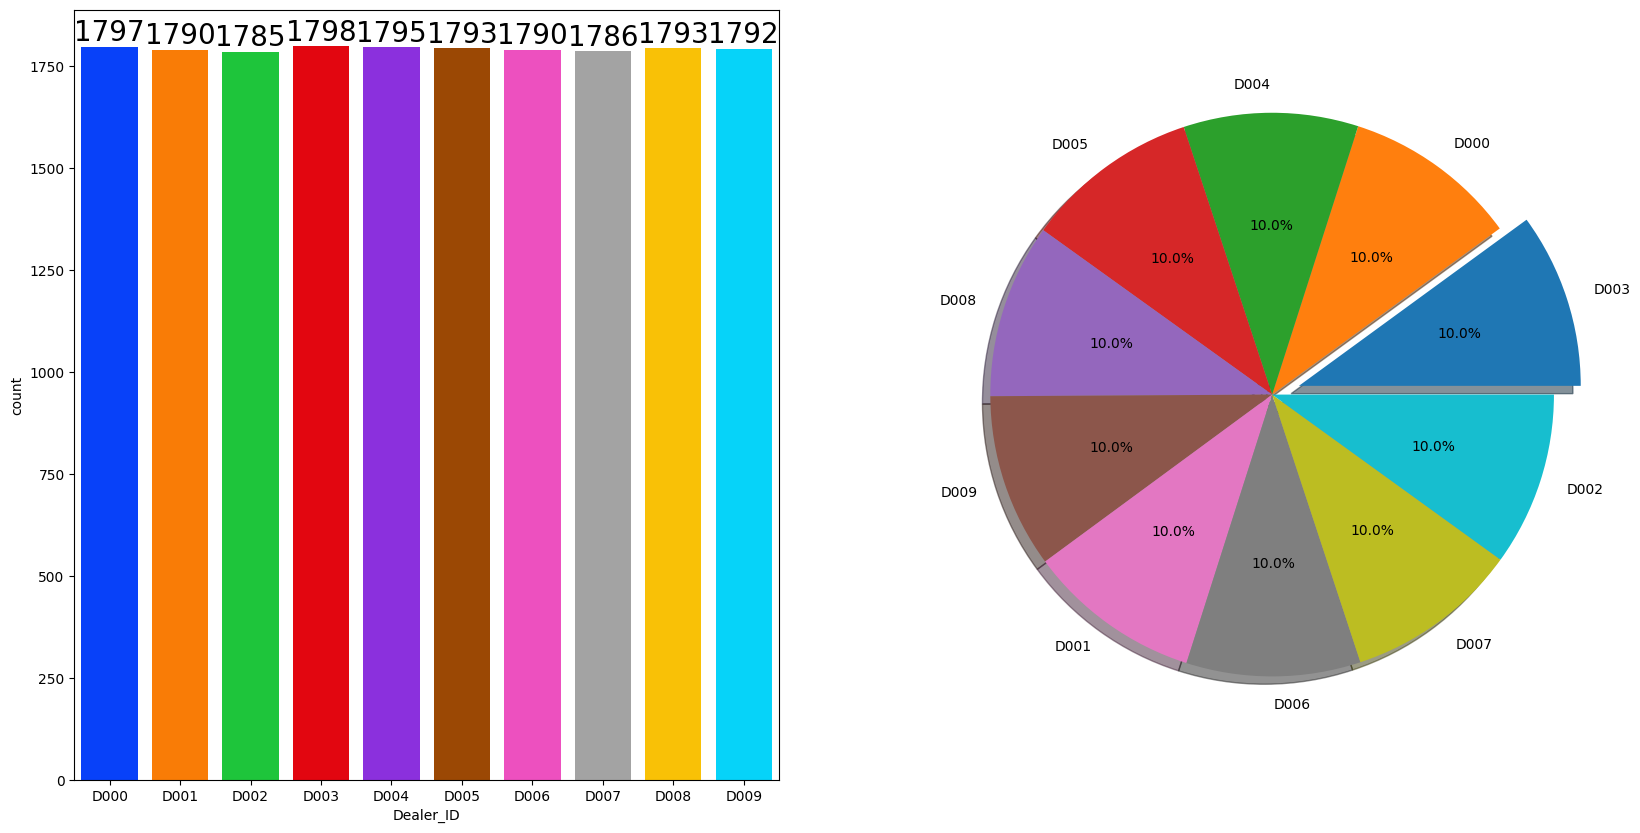

In [263]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=s['Dealer_ID'],data=s,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = s['Dealer_ID'].value_counts(),labels=s['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

### 8.4)BIVARIATE ANALYSIS ( Is Dealer has any impact on consumption ? )

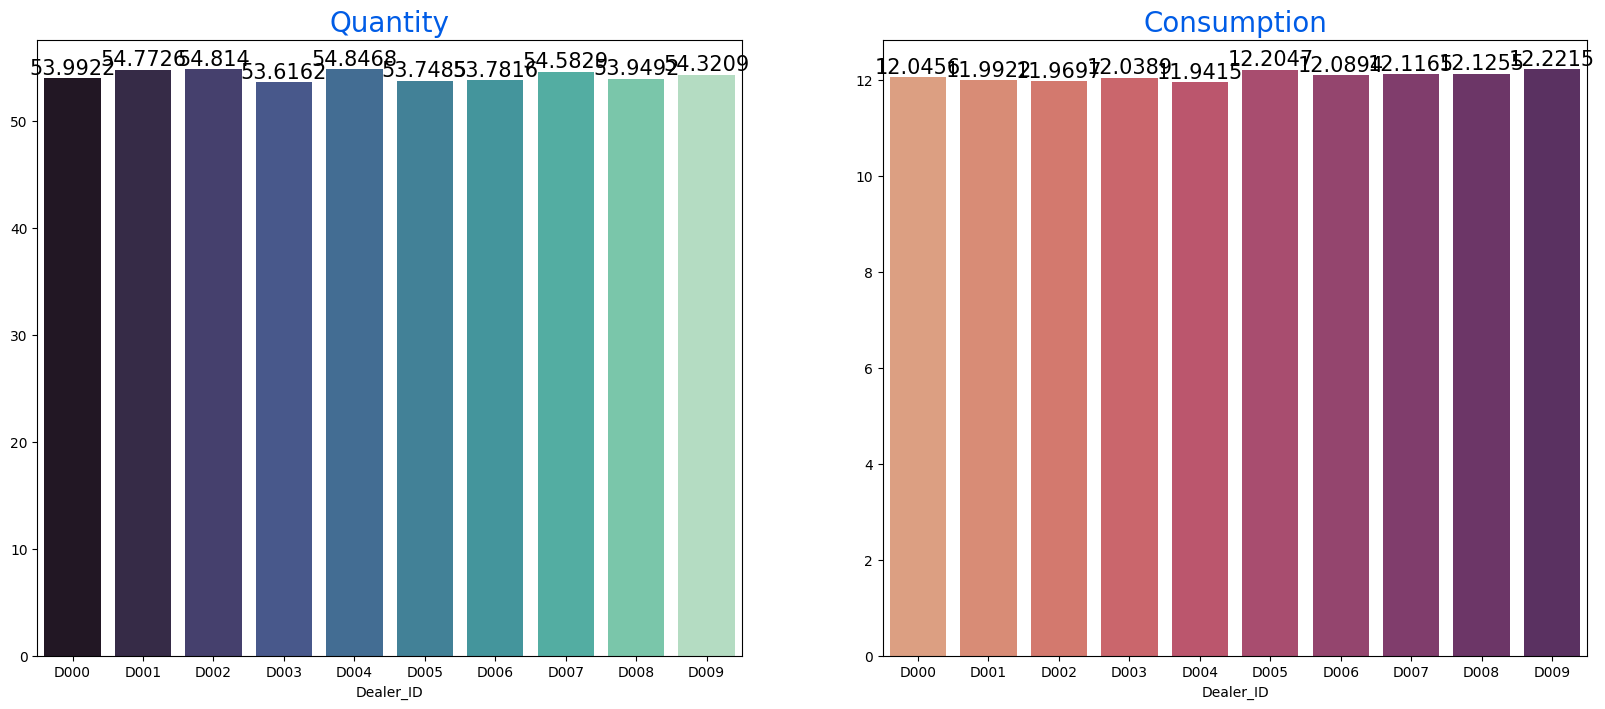

In [264]:
Group_data2=s.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
plt.show()

## On Product Column

### 8.5)UNIVARIATE ANALYSIS ( What is the most product most used? )

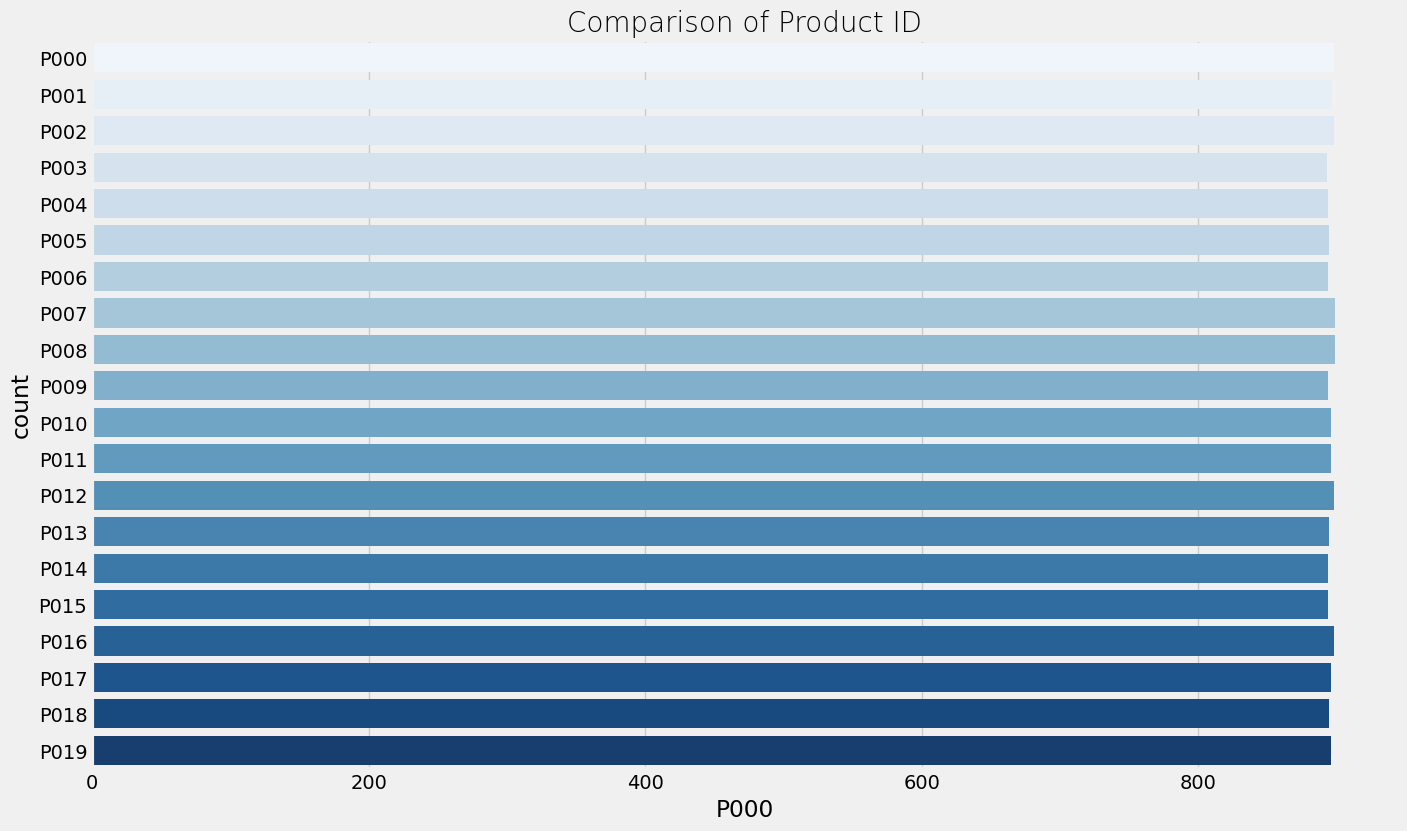

In [265]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(s['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

### 8.6)BIVARIATE ANALYSIS ( Is product id has any impact on consumption ? )

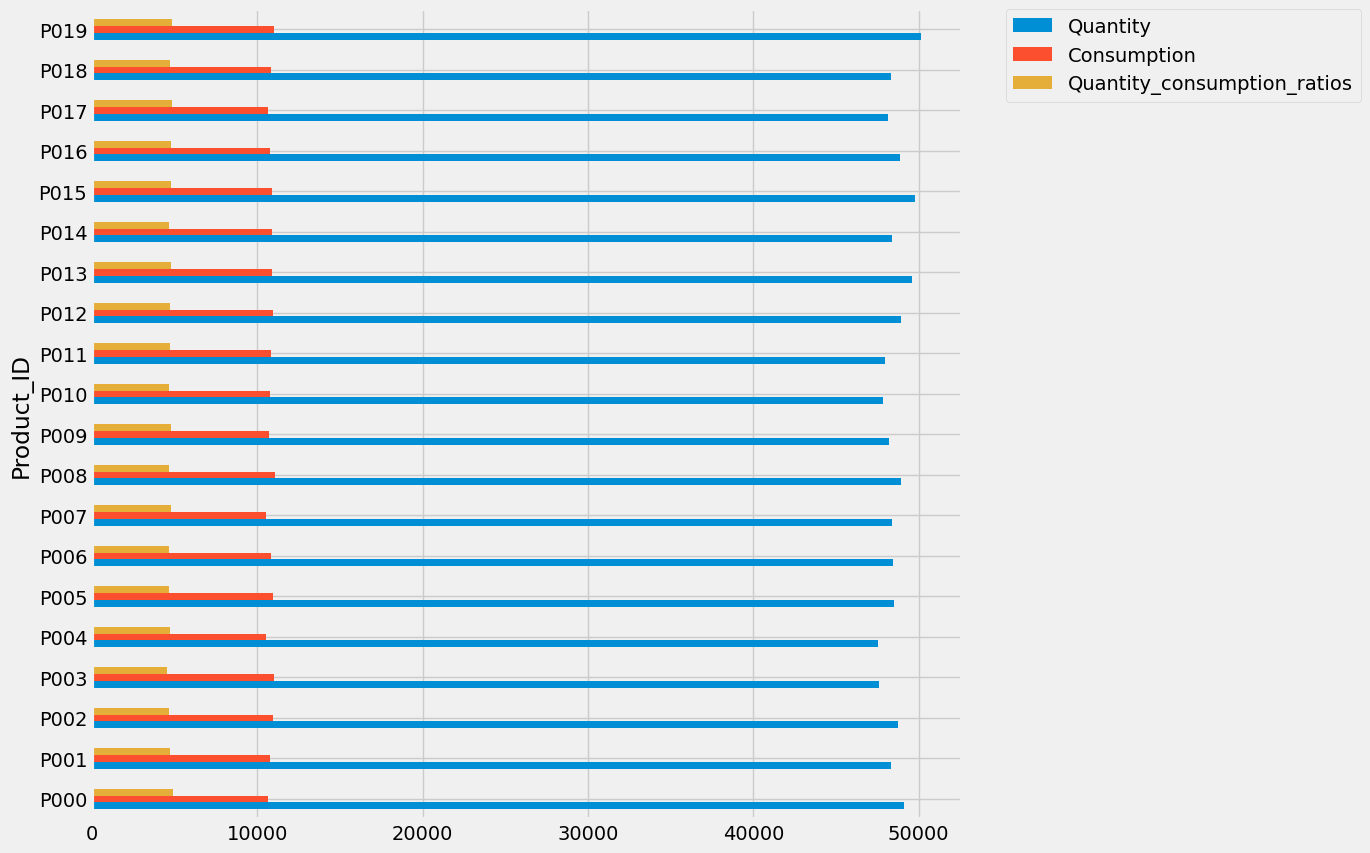

In [266]:
s.groupby('Product_ID').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [269]:
# Apply LabelEncoder to all categorical columns
categorical_columns = s.select_dtypes(include=['object']).columns

for column in categorical_columns:
    s[column] = label_encoder.fit_transform(s[column])

# After encoding, check the DataFrame
print(s.head())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardizing the numerical columns
s['Quantity'] = scaler.fit_transform(s[['Quantity']])  
s['Consumption'] = scaler.fit_transform(s[['Consumption']])

# Drop the 'Date' column if it's not needed
#s = s.drop('Date', axis=1)

# Define the target and features
X = s.drop(['Consumption_Level', 'Quantity_consumption_ratios'], axis=1)
y = s['Consumption_Level']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")


   Dealer_ID  Product_ID  Quantity  Consumption  Location  Outlier_IQR  \
0          0           0  0.299121    -0.939708         0            0   
1          0           0  0.607569    -0.709080         0            0   
2          0           0 -1.628682     1.135946         1            0   
3          0           0  0.761794     0.213433         1            0   
4          0           0  0.106341    -0.478452         1            0   

   Consumption_Level  Quantity_consumption_ratios  
0                  1                     7.750000  
1                  1                     7.777778  
2                  0                     0.705882  
3                  2                     5.692308  
4                  1                     5.700000  
Logistic Regression model accuracy: 100.00%


In [270]:
import joblib

# Save the trained LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl")

# Save the trained StandardScaler
joblib.dump(scaler, "scaler.pkl")

# Save the trained Logistic Regression model
joblib.dump(clf, "logistic_model.pkl")

# Save the feature names used during training
joblib.dump(X_train.columns.tolist(), "X_train_columns.pkl")

print("All objects saved successfully!")


All objects saved successfully!
